In [96]:
import pandas as pd
from preprocessing import load_data
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
# df = load_data(file_path='../data/dataset.csv')
df = pd.read_csv("../data/cleaned_data.csv")

In [98]:
# import re


# def sanitize_artist_names(df, column="artist_name"):
#     # Function to remove special characters and validate artist names
#     def clean_artist_names(artist_names):
#         try:
#             # Use regex to clean artist names
#             cleaned_names = re.sub(r"[^a-zA-Z0-9, ]", "", artist_names)
#             return cleaned_names
#         except Exception as e:
#             print(f"Error cleaning artist names: {e}")
#             return "Unknown"

#     df[column] = df[column].apply(clean_artist_names)
#     return df


# # Apply the sanitize function
# df = sanitize_artist_names(df)

In [99]:
# df.shape
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14025 entries, 0 to 14024
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             14025 non-null  int64  
 1   age                 14025 non-null  int64  
 2   education           14025 non-null  object 
 3   gender              14025 non-null  object 
 4   name                14025 non-null  object 
 5   country             14025 non-null  object 
 6   music               14025 non-null  object 
 7   artist_name         14025 non-null  object 
 8   featured_artists    14025 non-null  object 
 9   genre               14025 non-null  object 
 10  plays               14025 non-null  int64  
 11  artiste_popularity  14025 non-null  float64
 12  audio_popularity    14025 non-null  float64
 13  music_acousticness  14025 non-null  float64
 14  danceability        14025 non-null  float64
 15  energy              14025 non-null  float64
 16  key 

,user_id,age,education,gender,name,country,music,artist_name,featured_artists,genre,...,tempo,time_signature,track_genre,release_date,explicit,duration,music_id,id_artists,followers,scaled_ratings
count,14025.000000,14025.000000,14025,14025,14025,14025,14025,14025,14025,14025,...,14025.000000,14025.000000,14025,14025,14025,14025.000000,14025,14025,14025.000000,14025.000000
unique,NaN,NaN,4,2,648,2,6293,662,12242,37,...,NaN,NaN,58,948,2,NaN,6652,665,NaN,NaN
top,NaN,NaN,Graduate,Male,Michael,Urban,Closer,Drake,DaBaby,Classical,...,NaN,NaN,Unknown,2000-01-01,True,NaN,7BKLCZ1jbUBVqRi2FVlTVw,spotify:artist:3TVXtAsR1Inumwj472S9r4,NaN,NaN
freq,NaN,NaN,4397,7338,306,7221,35,398,11,1107,...,NaN,NaN,12214,6418,7031,NaN,33,398,NaN,NaN
mean,49776.053619,36.447558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.792963,3.995651,NaN,NaN,NaN,3.880570,NaN,NaN,500355.727059,2.850730
std,28832.891628,19.870351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.809054,0.770273,NaN,NaN,NaN,0.929399,NaN,NaN,288690.321259,1.475174
min,16.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.718000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1061.000000,1.000000
25%,24904.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.572846,3.000000,NaN,NaN,NaN,3.360000,NaN,NaN,249503.000000,1.000000
50%,49511.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.191264,4.000000,NaN,NaN,NaN,3.750000,NaN,NaN,500787.000000,3.565604
75%,74826.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159.940000,5.000000,NaN,NaN,NaN,4.240000,NaN,NaN,747938.000000,4.161373


In [76]:
# df.name.unique()

In [77]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Distribution of numerical features
# num
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# for column in numerical_columns:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()

# # Distribution of categorical features
# categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# for column in categorical_columns:
#     plt.figure(figsize=(10, 4))
#     sns.countplot(y=df[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [78]:
# df.info()

In [79]:
# # Fill missing values in 'featured_artists' and 'genre'
# df["featured_artists"].fillna("No Featured Artists", inplace=True)
# df["genre"].fillna("Unknown", inplace=True)

In [80]:
# # Convert to 'category' data type
# df['gender'] = df['gender'].astype('category')
# df['education'] = df['education'].astype('category')

# # Encode categorical variables
# df["gender"] = df["gender"].cat.codes
# df["education"] = df["education"].cat.codes

In [81]:
# Generate summary statistics
summary_stats = df.describe(include='all')
summary_stats


,user_id,age,education,gender,name,country,music,artist_name,featured_artists,genre,...,tempo,time_signature,track_genre,release_date,explicit,duration,music_id,id_artists,followers,scaled_ratings
count,14025.000000,14025.000000,14025,14025,14025,14025,14025,14025,14025,14025,...,14025.000000,14025.000000,14025,14025,14025,14025.000000,14025,14025,14025.000000,14025.000000
unique,NaN,NaN,4,2,648,2,6293,662,12242,37,...,NaN,NaN,58,948,2,NaN,6652,665,NaN,NaN
top,NaN,NaN,Graduate,Male,Michael,Urban,Closer,Drake,DaBaby,Classical,...,NaN,NaN,Unknown,2000-01-01,True,NaN,7BKLCZ1jbUBVqRi2FVlTVw,spotify:artist:3TVXtAsR1Inumwj472S9r4,NaN,NaN
freq,NaN,NaN,4397,7338,306,7221,35,398,11,1107,...,NaN,NaN,12214,6418,7031,NaN,33,398,NaN,NaN
mean,49776.053619,36.447558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.792963,3.995651,NaN,NaN,NaN,3.880570,NaN,NaN,500355.727059,2.850730
std,28832.891628,19.870351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.809054,0.770273,NaN,NaN,NaN,0.929399,NaN,NaN,288690.321259,1.475174
min,16.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.718000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1061.000000,1.000000
25%,24904.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.572846,3.000000,NaN,NaN,NaN,3.360000,NaN,NaN,249503.000000,1.000000
50%,49511.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.191264,4.000000,NaN,NaN,NaN,3.750000,NaN,NaN,500787.000000,3.565604
75%,74826.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159.940000,5.000000,NaN,NaN,NaN,4.240000,NaN,NaN,747938.000000,4.161373


In [82]:
# # Fill missing values in 'featured_artists' and 'genre'
# df['featured_artists'].fillna('No Featured Artists', inplace=True)
# df['genre'].fillna('Unknown', inplace=True)


In [100]:
# Check for inconsistencies in 'age'
print(df['age'].unique())

# Assuming age should be between 10 and 100
df = df[(df['age'] >= 13) & (df['age'] <= 80)]

# Check for inconsistencies in 'country'
print(df['country'].unique())
# If necessary, standardize country names or handle special cases

# Verify and correct any other inconsistencies
# For instance, check if 'duration' is reasonable
print(df['duration'].describe())
# Assuming duration should be between 0 and 20 minutes
df = df[(df['duration'] > 0) & (df['duration'] <= 20)]


[16 44 18 60 15 35 57 17 62 14 34 50 37 78 19 55 61 64 63 77 20 74 38 25
 41 80 49 32 31 13 52 68 27 29 51 76 58 66 39 24 22 21 70 45 46 43 36 59
 26 47 28 23 40 65 56 33 79 69 53 48 54 30 67 73 42 72 71 75]
[' Urban ' ' Non-Urban ']
count    14025.000000
mean         3.880570
std          0.929399
min          0.000000
25%          3.360000
50%          3.750000
75%          4.240000
max         20.080000
Name: duration, dtype: float64


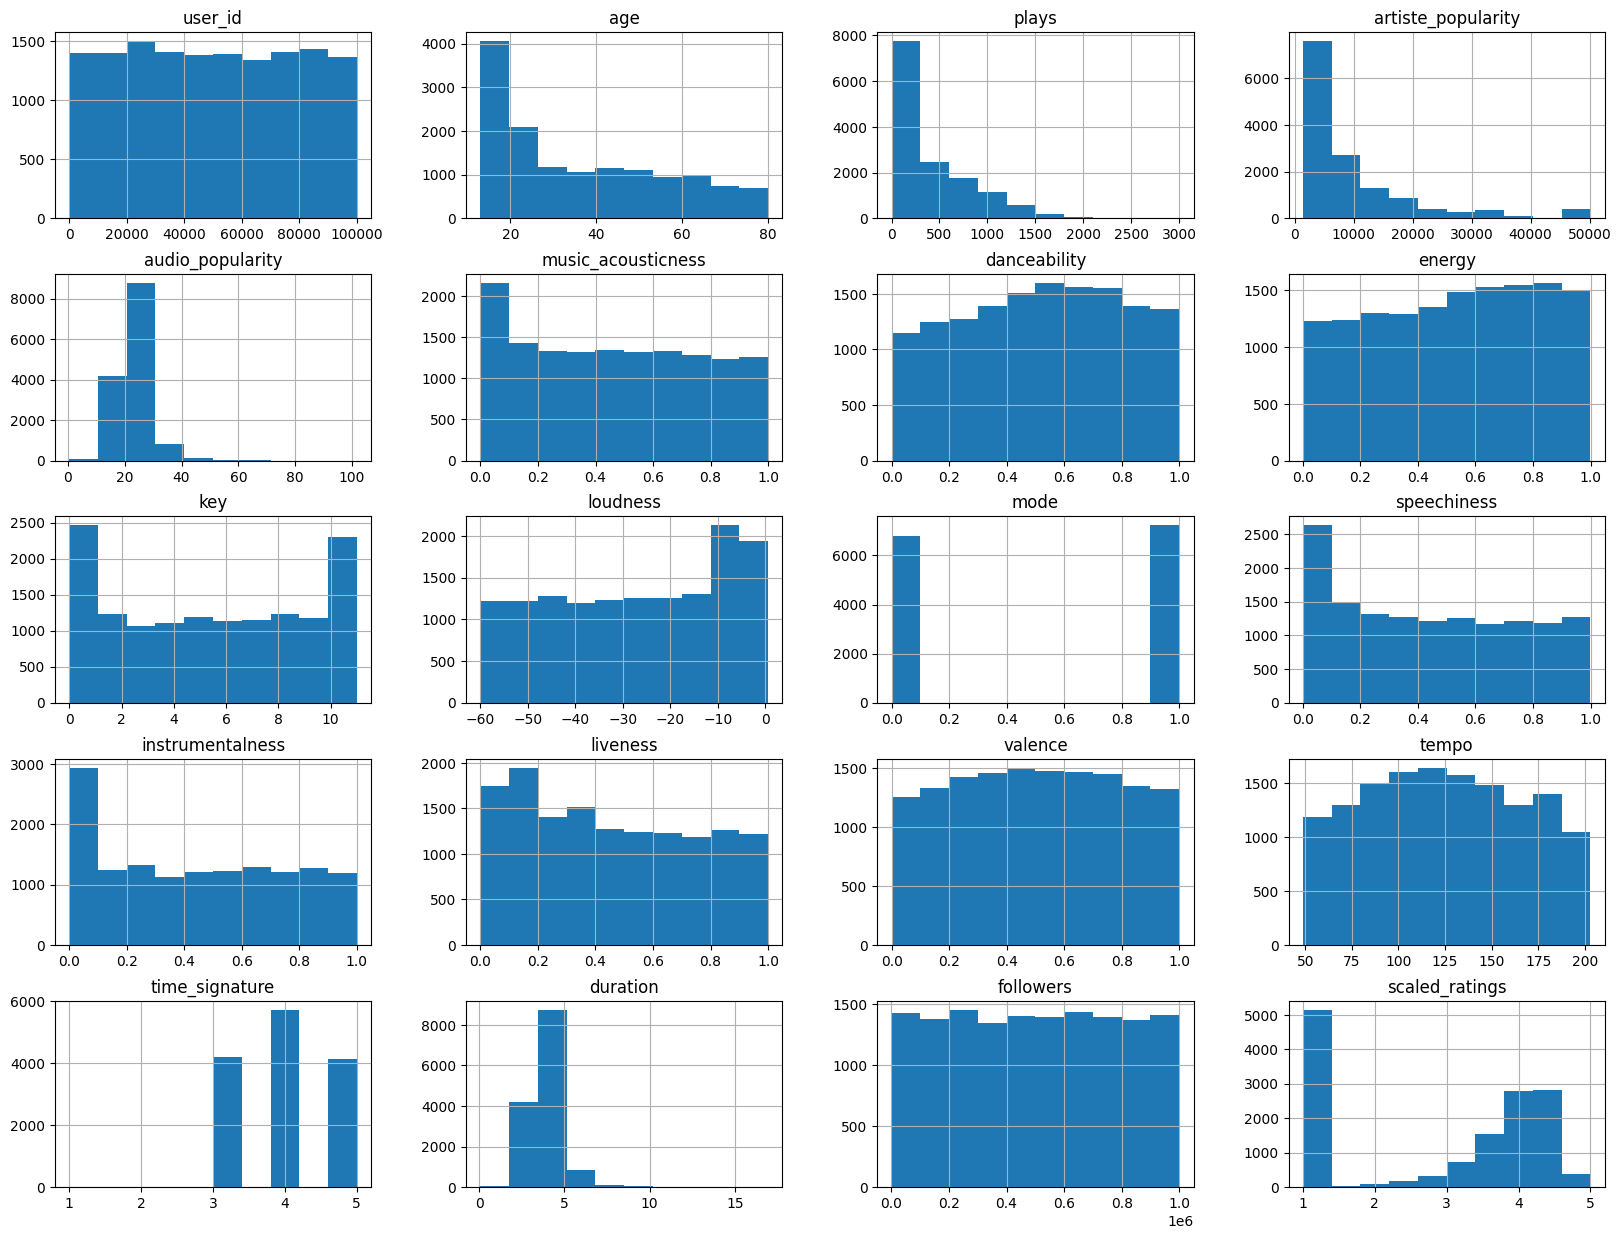

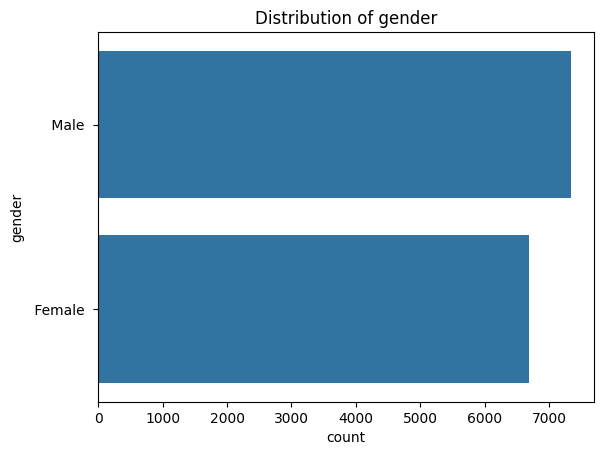

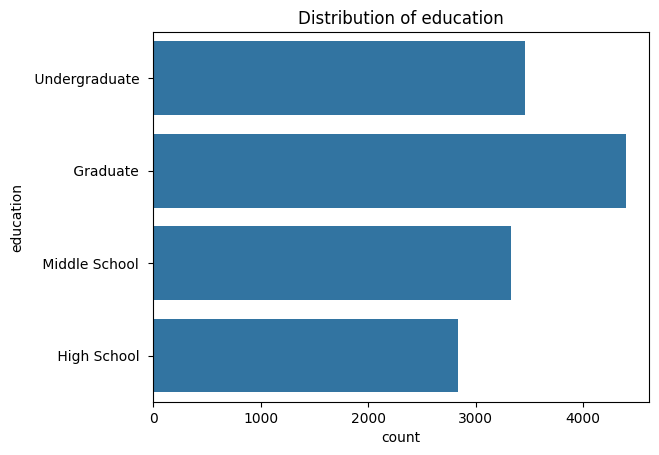

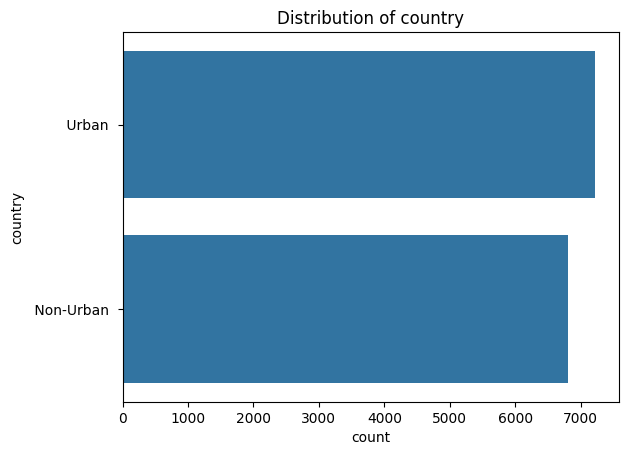

In [84]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(20, 15))
plt.show()

# Plot bar charts for categorical features
categorical_features = ['gender', 'education', 'country']
for feature in categorical_features:
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


C:\Users\jnopa\AppData\Local\Temp\ipykernel_22444\3572357288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


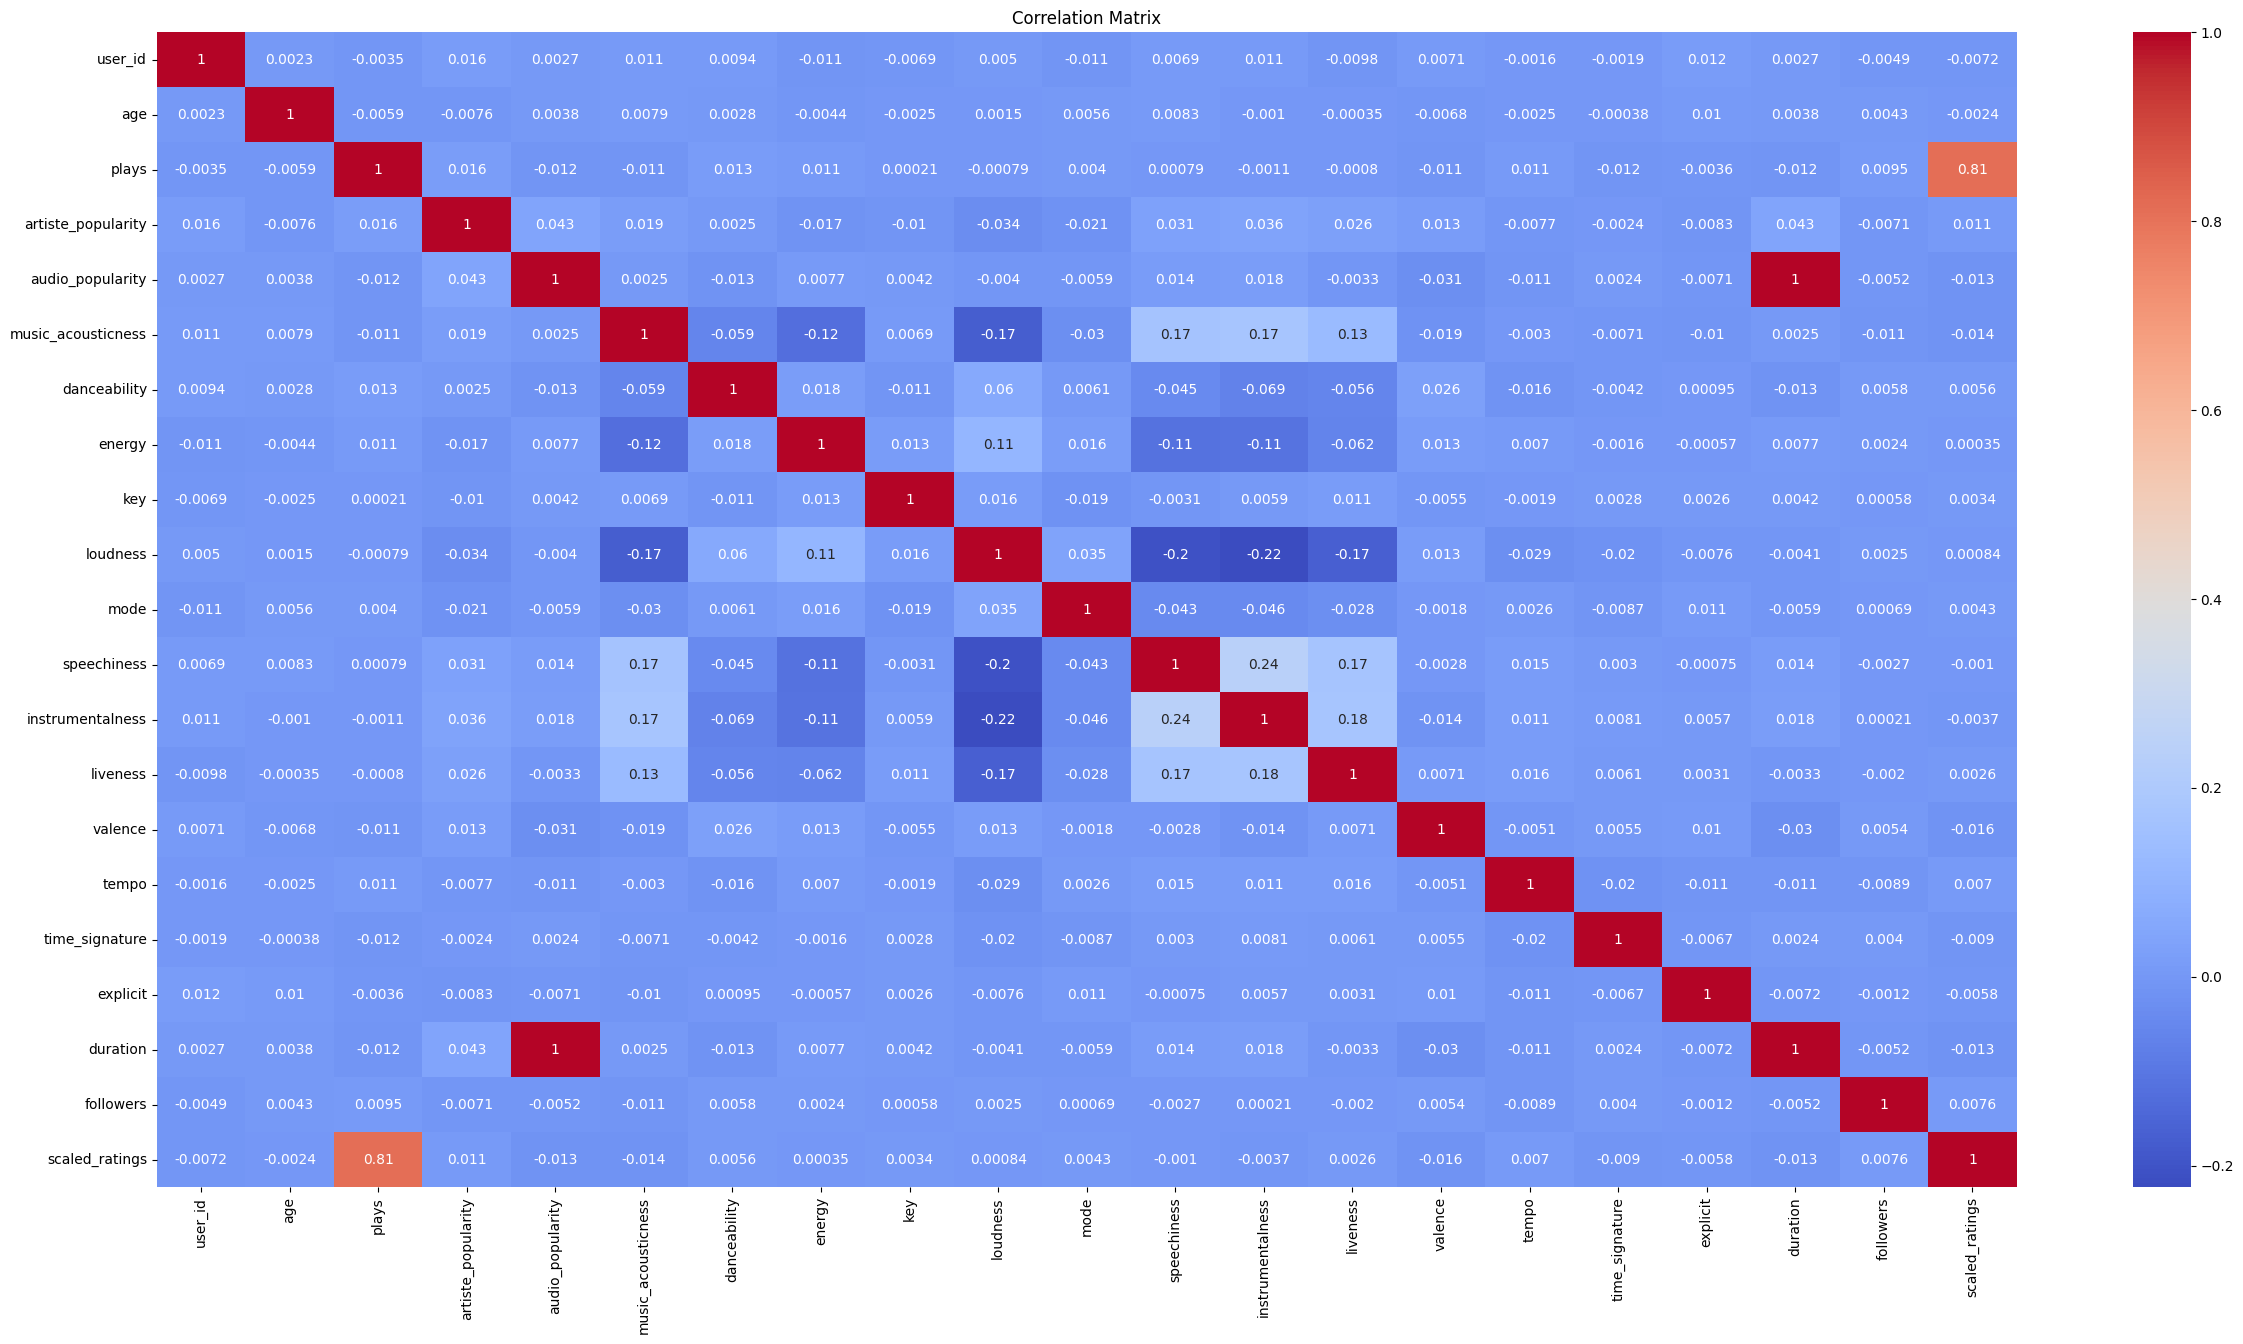

In [87]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Use heatmap to visualize correlations
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [103]:
# from pandas_profiling import ProfileReport

# df_ = pd.read_csv("../data/cleaned_data.csv")
# profile = ProfileReport(df_, title="Pandas Profiling Report")

# profile.to_notebook_iframe()

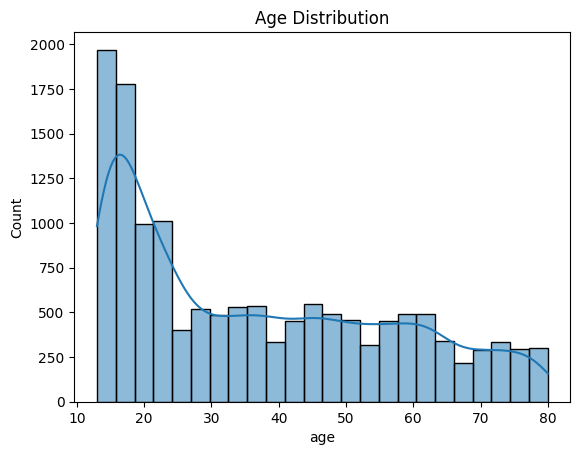

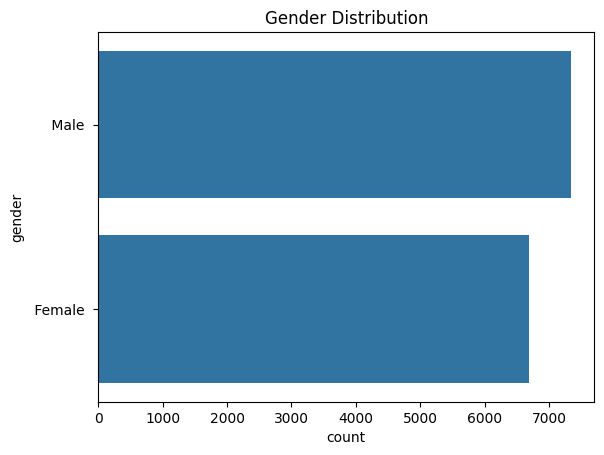

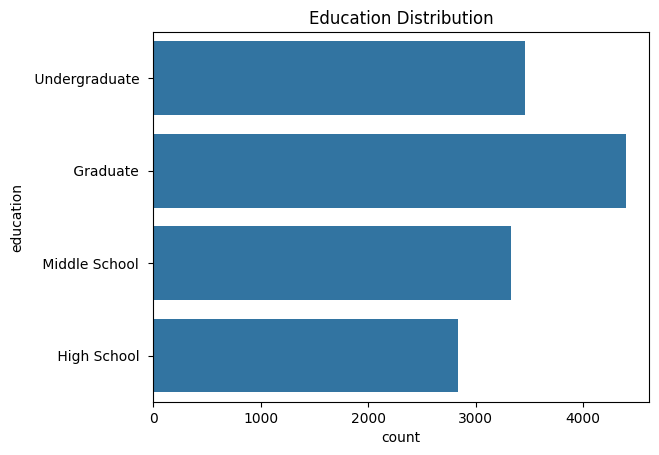

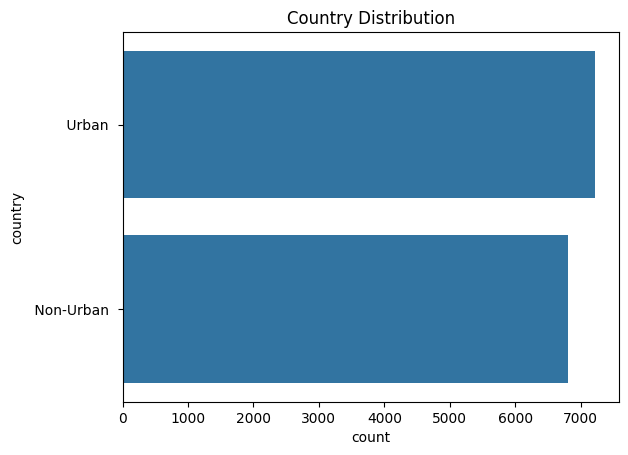

In [90]:
# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of gender
sns.countplot(df['gender'])
plt.title('Gender Distribution')
plt.show()

# Distribution of education
sns.countplot(df['education'])
plt.title('Education Distribution')
plt.show()

# Distribution of country
sns.countplot(y=df['country'])
plt.title('Country Distribution')
plt.show()


In [105]:
sns.regplot?

Signature:
sns.regplot(
    data=None,
    *,
    x=None,
    y=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-

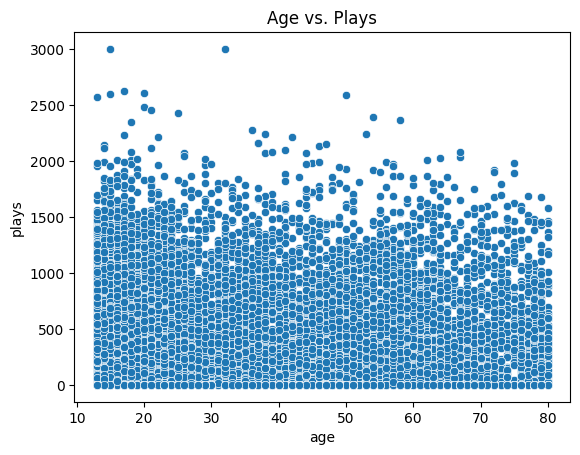

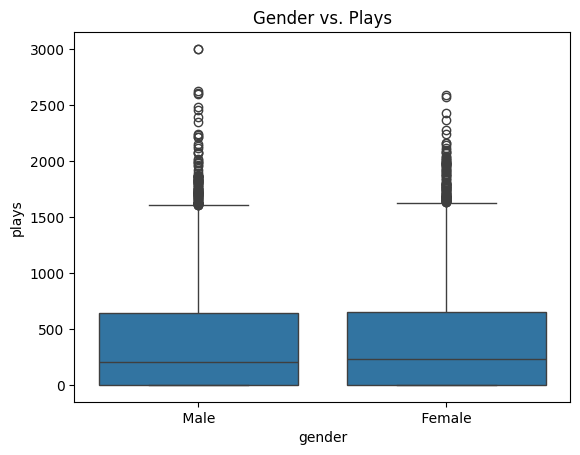

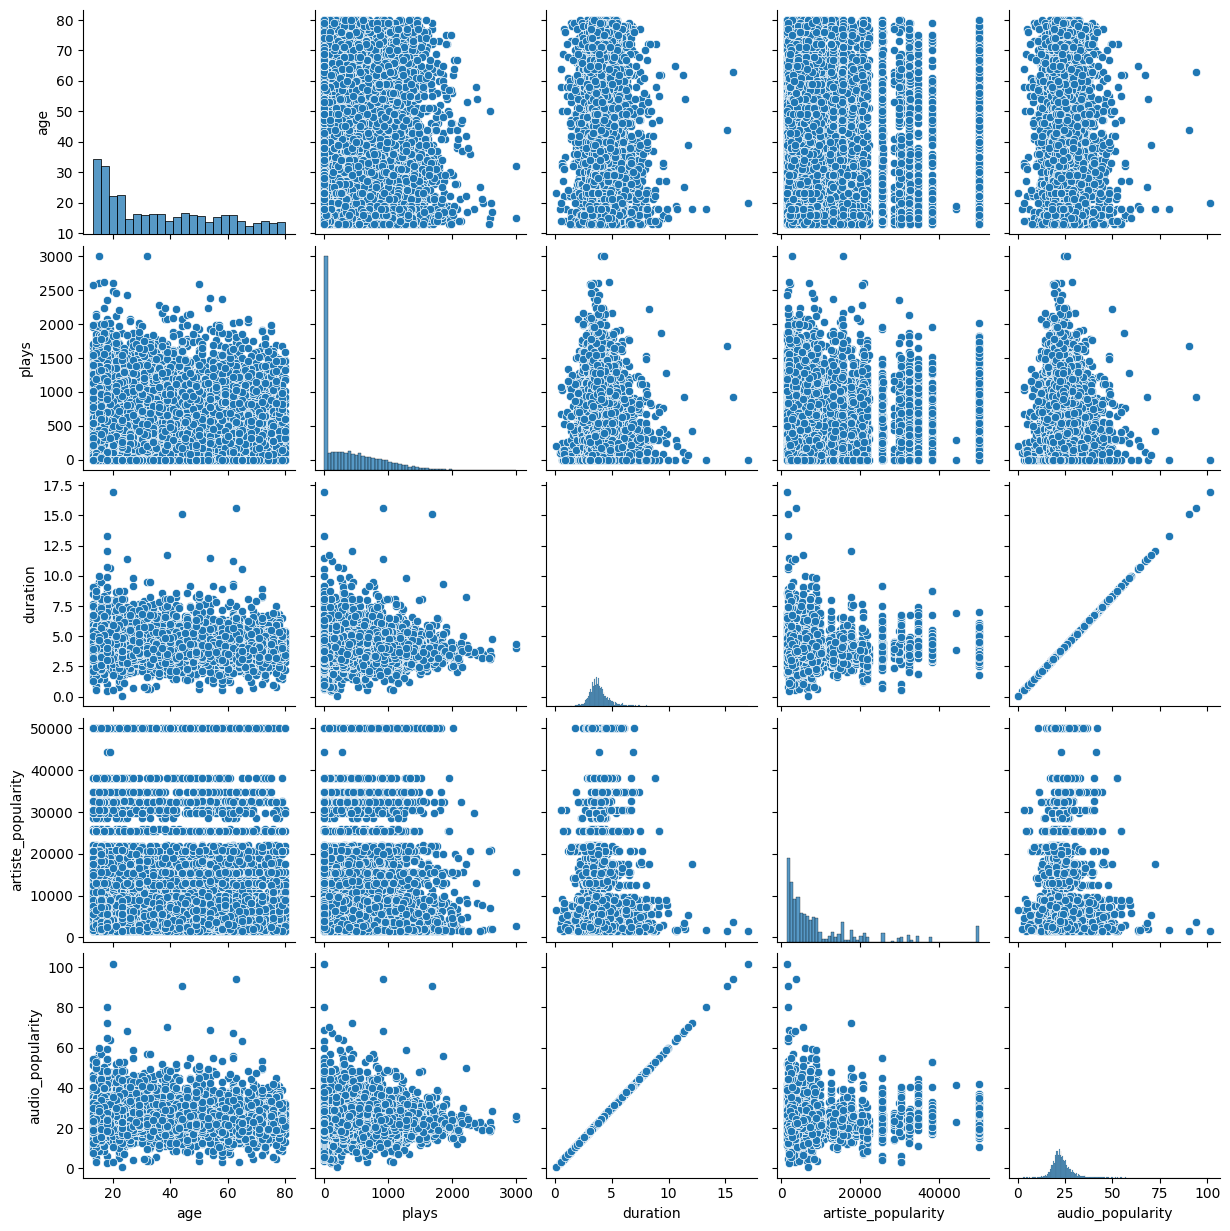

In [107]:
# Scatter plot of age vs. plays
sns.scatterplot(x='age', y='plays', data=df)
plt.title('Age vs. Plays')
plt.show()

# Box plot of gender vs. plays
sns.boxplot(x='gender', y='plays', data=df)
plt.title('Gender vs. Plays')
plt.show()

# Pair plot of key features
sns.pairplot(df[['age', 'plays', 'duration', 'artiste_popularity', 'audio_popularity']])
plt.show()


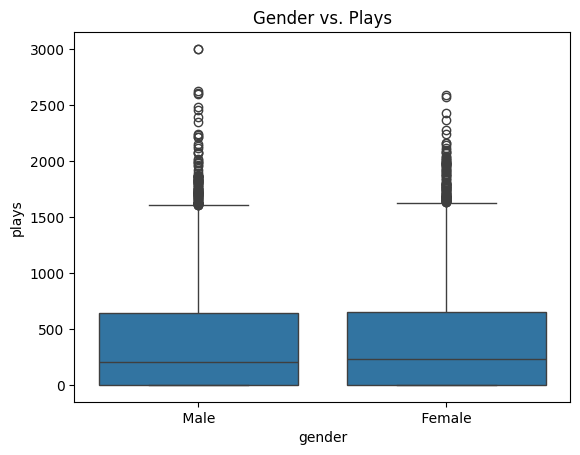

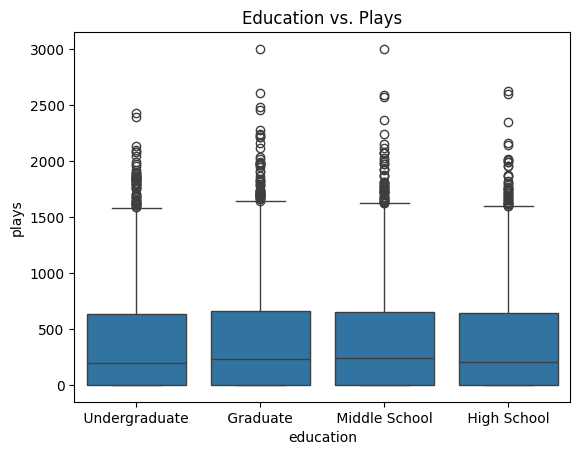

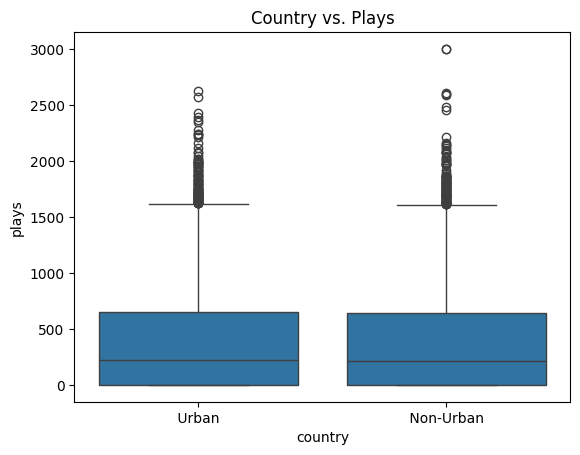

In [92]:
# Influence of demographic variables on music preferences
sns.boxplot(x='gender', y='plays', data=df)
plt.title('Gender vs. Plays')
plt.show()

sns.boxplot(x='education', y='plays', data=df)
plt.title('Education vs. Plays')
plt.show()

sns.boxplot(x='country', y='plays', data=df)
plt.title('Country vs. Plays')
plt.show()


In [94]:
# Select numeric columns only
df_numeric = df.select_dtypes(include=[np.number])

# Identify outliers using IQR method
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))
print(outliers.sum())

# Remove outliers
df_no_outliers = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

user_id                  0
age                      0
plays                  210
artiste_popularity    1118
audio_popularity       720
music_acousticness       0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
duration               718
followers                0
scaled_ratings           0
dtype: int64


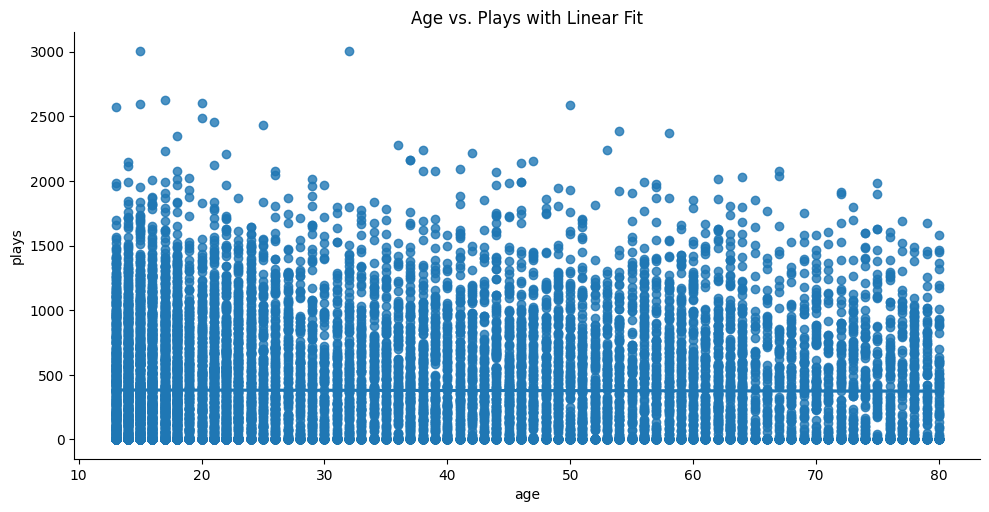

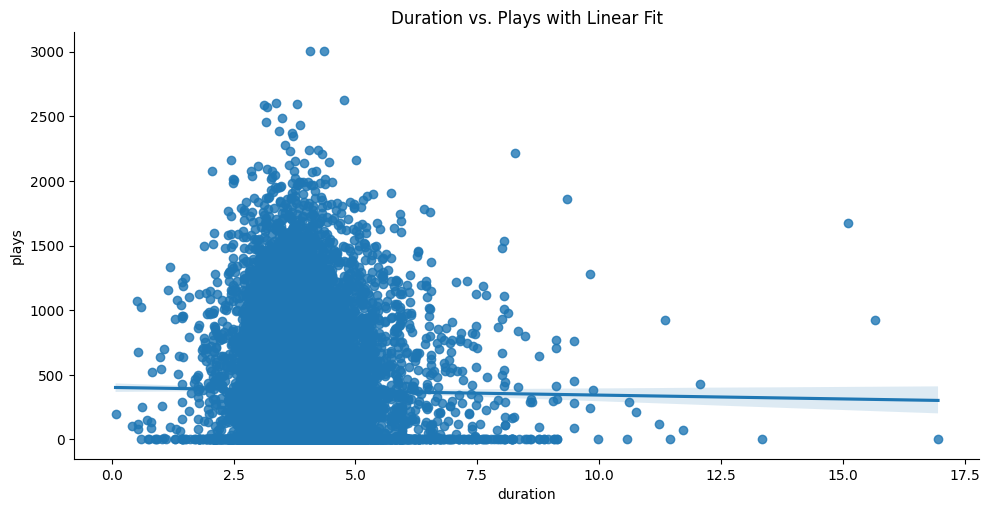

In [95]:
# Deeper analysis of relationships identified during visualization
# Example: Age and Plays
sns.lmplot(x='age', y='plays', data=df, aspect=2)
plt.title('Age vs. Plays with Linear Fit')
plt.show()

# Example: Duration and Plays
sns.lmplot(x='duration', y='plays', data=df, aspect=2)
plt.title('Duration vs. Plays with Linear Fit')
plt.show()


The two scatter plots you've generated provide some useful insights into the relationships between age, duration, and the number of plays in your dataset.

Image 1: Age vs. Plays with Linear Fit
This scatter plot shows the relationship between age and the number of plays. The data points are quite scattered, but there appears to be a general downward trend, suggesting that as age increases, the number of plays tends to decrease. However, the linear fit line indicates a relatively weak negative correlation, as there is still a lot of variability in the data points around the line.

Image 2: Duration vs. Plays with Linear Fit
This scatter plot shows the relationship between duration and the number of plays. Here, we can see a more distinct pattern. The data points form a somewhat triangular shape, with a dense cluster of points at the lower end of the duration range, and then a gradually decreasing number of points as the duration increases. The linear fit line suggests a positive correlation between duration and the number of plays, but the relationship appears to be non-linear, with the number of plays increasing more rapidly for shorter durations and then plateauing or increasing more slowly for longer durations.

Next steps:
1. Assess the strength and significance of the correlations: Calculate correlation coefficients (e.g., Pearson's r) and their associated p-values to determine the strength and statistical significance of the relationships between age, duration, and the number of plays.

2. Explore non-linear relationships: Since the scatter plot for duration vs. plays suggests a non-linear relationship, you might consider fitting a non-linear model (e.g., polynomial regression, logarithmic regression) to better capture the pattern in the data.

3. Investigate other potential predictors: Examine the relationships between the number of plays and other variables in your dataset, as there might be additional factors influencing the number of plays.

4. Perform regression analysis: Once you've identified the most relevant predictors, you can build a multiple regression model to quantify the impact of each predictor on the number of plays, while controlling for the other variables.

5. Validate and refine the model: Split your data into training and test sets, evaluate the performance of your model on the test set, and consider techniques like cross-validation and regularization to improve the model's generalization and prevent overfitting.

6. Interpret and communicate findings: Summarize the key insights from your analysis, including the strength and direction of the relationships between the predictors and the number of plays, and discuss the practical implications of your findings.
